In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style('whitegrid')

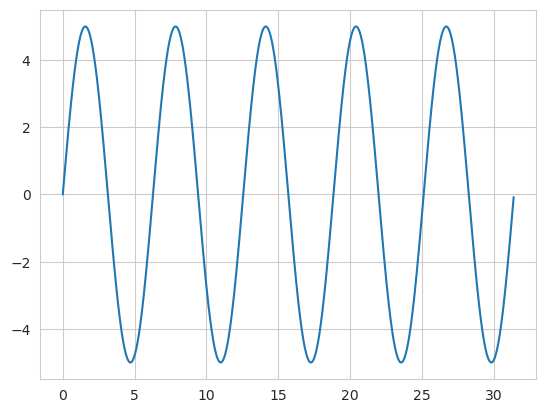

In [4]:
xs = np.linspace(0, 3.14*10, 10000)
ys = (5 * np.sin(xs))

plt.plot(xs, ys)

In [43]:
def acf(x, lag=0):
    if lag == 0:
        return 1
        
    x0 = x[:-lag]
    x1 = np.roll(x, -lag)[:-lag]
    cov = ((x0 - x.mean()) * (x1 - x.mean())).mean()
    cov0 = ((x0 - x.mean()) * (x0 - x.mean())).mean()
    return cov / cov0

In [44]:
acf(ys, lag=1)

0.9999950995796757

In [45]:
sm.tsa.acf(ys)[1]

0.9999950488532988

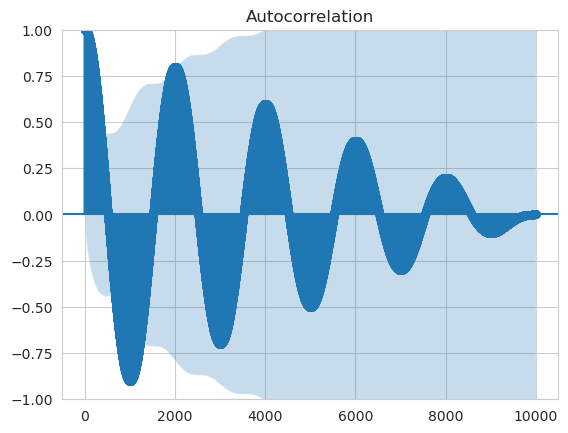

In [7]:
_ = sm.graphics.tsa.plot_acf(ys, lags=ys.shape[0]-1)

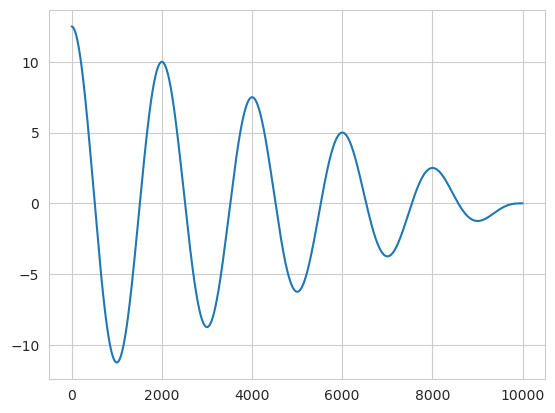

In [8]:
plt.plot(sm.tsa.acovf(ys))

### Lake Huron Data

In [4]:
df = pd.read_csv('data/lake-huron.csv').set_index('time')

In [124]:
X = sm.add_constant(np.arange(df.shape[0]) + 1)
y = df.LakeHuron

In [125]:
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LakeHuron   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     35.95
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.55e-08
Time:                        21:45:03   Log-Likelihood:                -150.05
No. Observations:                  98   AIC:                             304.1
Df Residuals:                      96   BIC:                             309.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        580.2020      0.230   2521.398      0.000     579.745     580.659
x1            -0.0242      0.004     -5.996      0.000      -0.032      -0.016
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.274
Skew:                          -0.039   Prob(JB):                        0.529
Kurtosis:                       2.447   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

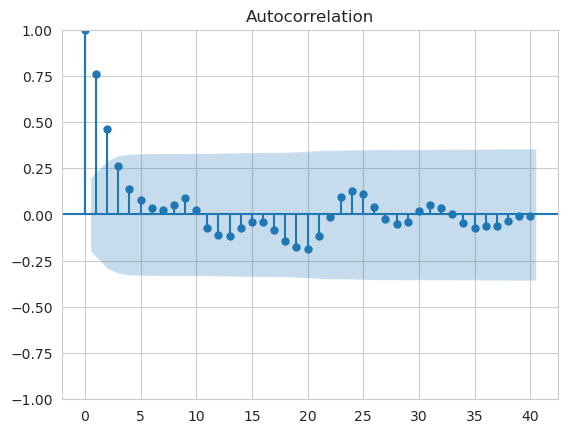

In [137]:
sr = ols.resid
_ = sm.graphics.tsa.plot_acf(sr, lags=40)

<AxesSubplot:>

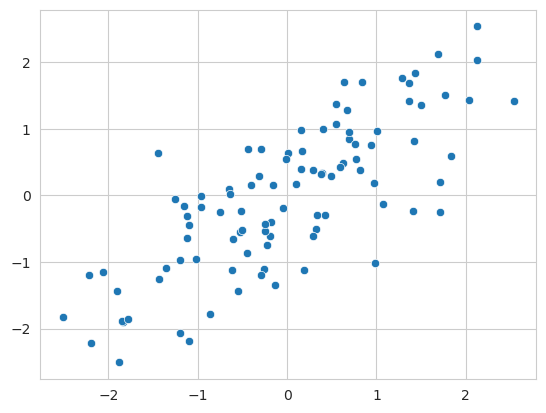

In [138]:
sns.scatterplot(x=sr, y=sr.shift())

In [168]:
ar = sm.tsa.AutoReg(sr, lags=[1, 2], trend='n').fit()
ar.summary()

/home/ztang484/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   98
Model:                     AutoReg(2)   Log Likelihood                 -97.202
Method:               Conditional MLE   S.D. of innovations              0.666
Date:                Mon, 19 Dec 2022   AIC                            200.405
Time:                        21:55:15   BIC                            208.098
Sample:                             2   HQIC                           203.515
                                   98                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           1.0020      0.096     10.472      0.000       0.814       1.190
y.L2          -0.2834      0.097     -2.910      0.004      -0.474      -0.093
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7678           -0.6352j            1.8785           -0.0549
AR.2            1.7678           +0.6352j            1.8785            0.0549
-----------------------------------------------------------------------------
"""

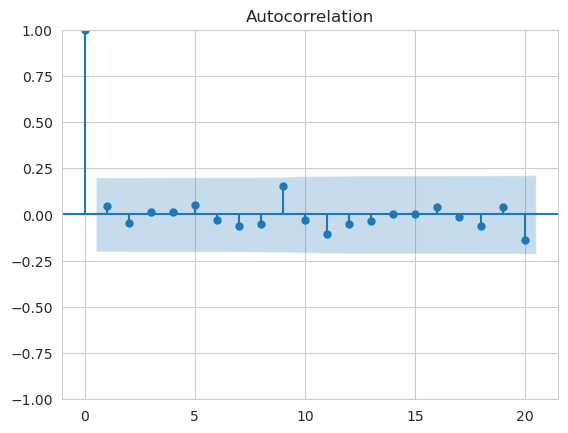

In [178]:
_ = sm.graphics.tsa.plot_acf(ar.resid)

<AxesSubplot:>

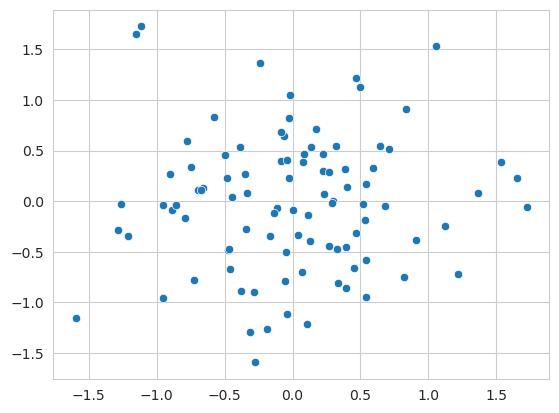

In [179]:
sns.scatterplot(x=ar.resid, y=ar.resid.shift())